In [11]:
import statsmodels.api as sm
import numpy as np

In [5]:
from statsmodels.gam.api import GLMGam, BSplines

In [6]:
from statsmodels.gam.tests.test_penalized import df_autos

In [7]:
# create spline basis for weight and hp
x_spline = df_autos[['weight', 'hp']]

In [8]:
bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])

In [12]:
# penalization weight
alpha = np.array([21833888.8, 6460.38479])

In [13]:
gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos,
                             smoother=bs, alpha=alpha)

In [14]:
res_bs = gam_bs.fit()

In [15]:
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   189.13
Model Family:                Gaussian   Df Model:                        12.87
Link Function:               identity   Scale:                          4.8825
Method:                         PIRLS   Log-Likelihood:                -441.81
Date:                Sun, 31 Jul 2022   Deviance:                       923.45
Time:                        21:54:41   Pearson chi2:                     923.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.9923      1.997     26.034   

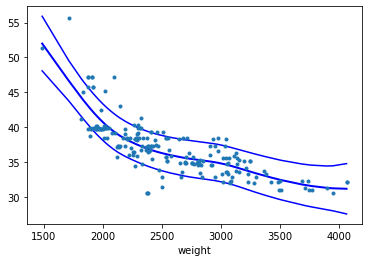

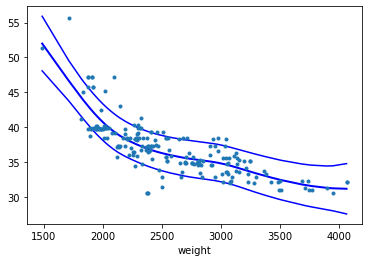

In [16]:
# plot smooth components
res_bs.plot_partial(0, cpr=True)

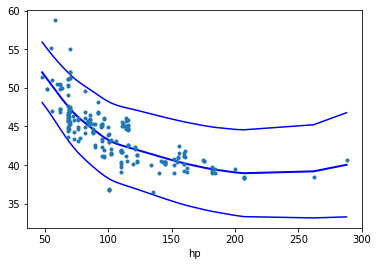

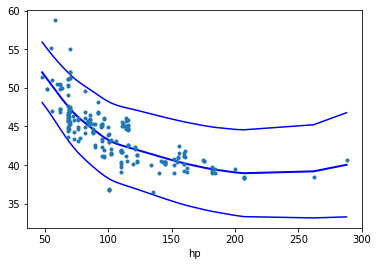

In [17]:
res_bs.plot_partial(1, cpr=True)

In [18]:
alpha = np.array([8283989284.5829611, 14628207.58927821])

In [19]:
gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos,
                              smoother=bs, alpha=alpha,
                              family=sm.families.Poisson())

In [20]:
res_bs = gam_bs.fit()

In [21]:
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   194.75
Model Family:                 Poisson   Df Model:                         7.25
Link Function:                    Log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -530.38
Date:                Sun, 31 Jul 2022   Deviance:                       37.569
Time:                        21:55:44   Pearson chi2:                     37.4
No. Iterations:                     6   Pseudo R-squ. (CS):             0.7715
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9960      0.130     30.844   

In [22]:
gam_bs.select_penweight()[0]

array([8.28395980e+09, 1.46279686e+07])

In [23]:
gam_bs.select_penweight_kfold()[0]

(10000000.0, 3162.2776601683795)